In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def ColumnNames():
    return ['col1', 'col2', 'col3', 'average']

def PreProcess(filepath, skiprows, usecols): 
    """
    This function reads data and add min, max, include_mean values.
    
    Parameters
    ----------
    filepath : filepath of the data
    skiprows: number of rows to skip from the csv file
    usecols: range of columns of data to read in.
               
    Returns
    -------
    data : The original count data and some added columns of new stats data.
    """
    print 'Reading Data from \"{0}\"'.format(os.path.basename(filepath))
    data = pd.read_csv(filepath, skiprows=skiprows,usecols=usecols,na_values=' ', header = None, names = ColumnNames() ).dropna(axis=0)
    data['col_min'] = data.apply(lambda row: min(row['col1'],row['col2'],row['col3']), axis=1)
    data['col_max'] = data.apply(lambda row: max(row['col1'],row['col2'],row['col3']), axis=1)
    data['col_median'] = data.apply(lambda row: np.median([row['col1'],row['col2'],row['col3']]), axis=1)
    data['col_gap'] = data['col_max']-data['col_min']
    data['complete'] = data['col_gap']>=2
    data['include_mean'] = data.apply(lambda row: ((row['col1'] == round(row['average']) or row['col2'] == round(row['average']) or 
                                                               row['col3'] == round(row['average'])) and row['complete']),axis=1)
    return  data

def GetStats(data):
    """
    This function reads data and print relevant stats.
    
    Parameters
    ----------
    data : preprocessed data with the desired columns
    """    
    total = len(data)
    complete = len(data[data['complete']])
    no_mean = len(data[data['include_mean'] == True])
    mid_ratio = data[data['complete']].apply(lambda row: (row['col_median']-row['col_min'])/row['col_gap'], axis=1)
    plt.figure();
    sns.distplot(mid_ratio, bins=10, norm_hist=True)
    print 'total:{0}, number_of_complete:{1}, number_of_mean:{2}'.format(total, complete, no_mean)

In [56]:
data_dir = '../data/PittHill_OSFdata_2016/csv/'
rts_colony = PreProcess(os.path.join(data_dir,'Bishayee Colony Counts 10.27.97-3.8.01.csv'),3,range(3,7))
others_colony = PreProcess(os.path.join(data_dir,'Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.csv'),2,range(3,7))
rts_coulter = PreProcess(os.path.join(data_dir,'Bishayee Coulter Counts.10.20.97-7.16.01.csv'),2,range(2,6))
others_coulter = PreProcess(os.path.join(data_dir,'Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.csv'),2,range(2,6))


Reading Data from "Bishayee Colony Counts 10.27.97-3.8.01.csv"
Reading Data from "Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.csv"
Reading Data from "Bishayee Coulter Counts.10.20.97-7.16.01.csv"
Reading Data from "Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.csv"


total:1361, number_of_complete:1343, number_of_mean:690
total:597, number_of_complete:578, number_of_mean:109
total:1727, number_of_complete:1726, number_of_mean:176
total:929, number_of_complete:929, number_of_mean:36


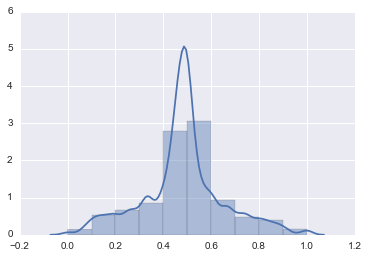

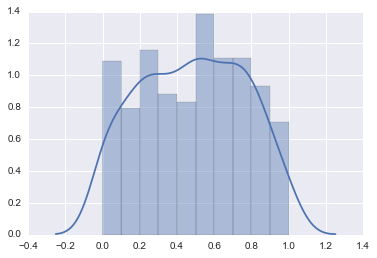

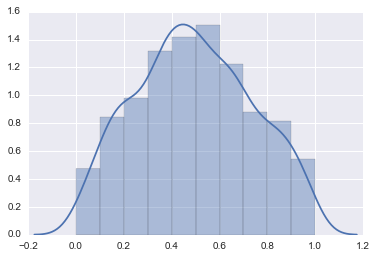

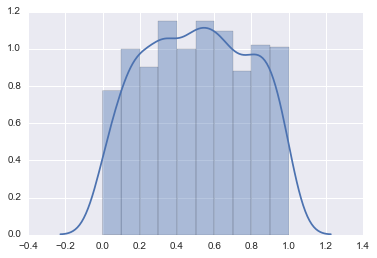

In [57]:
GetStats(rts_colony)
GetStats(others_colony)
GetStats(rts_coulter)
GetStats(others_coulter)
